## EDA 

<div class="alert alert-block alert-info">
 The main purpose of the EDA is to identify the necessary data transformations to prepare the data for constructing a linear regression model for predictive purposes. The transformations revealed during EDA serve as a prototype for the feature selection, and the resultant dataset is subsequently employed for model training and model prediction.
</div>

Let's start reading the datasets and analyzing what kind of information each has, making comparisons to identify differences, and establishing a structured approach for standardization.

In [4]:
# We can't forget to import the dependencies

import re
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from tabulate import tabulate

### Let's read the datasets

#### Dataset 2015

In [5]:
df_2015=pd.read_csv("../data/2015.csv")
df_2015.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Dataset 2016

In [7]:
df_2016=pd.read_csv("../data/2016.csv")
df_2016.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


#### Dataset 2017

In [8]:
df_2017=pd.read_csv("../data/2017.csv")
df_2017.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


#### Dataset 2018

In [9]:
df_2018=pd.read_csv("../data/2018.csv")
df_2018.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


#### Dataset 2019

In [10]:
df_2019=pd.read_csv("../data/2019.csv")
df_2019.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Analyzing the datasets

#### Comparing shapes

In [11]:
dataframes = {
    'df_2015': df_2015,
    'df_2016': df_2016,
    'df_2017': df_2017,
    'df_2018': df_2018,
    'df_2019': df_2019
}

def get_shapes_compare(dataframes):
    shape_info = [] 

    for dataset_name, dataset in dataframes.items():
        shape = dataset.shape
        shape_info.append({
            'Dataset': dataset_name,
            'Number of rows': shape[0],
            'Number of columns': shape[1]
        })

    shapes_df = pd.DataFrame(shape_info)
    return shapes_df

shapes_df = get_shapes_compare(dataframes)
shapes_compare = tabulate(shapes_df, headers='keys', tablefmt='pretty', showindex=False)
print(shapes_compare)


+---------+----------------+-------------------+
| Dataset | Number of rows | Number of columns |
+---------+----------------+-------------------+
| df_2015 |      158       |        12         |
| df_2016 |      157       |        13         |
| df_2017 |      155       |        12         |
| df_2018 |      156       |         9         |
| df_2019 |      156       |         9         |
+---------+----------------+-------------------+


Initial observations show that the varying number of columns in each dataset is currently making data integration a significant challenge. To address this problem, the person in charge will conduct a careful analysis of the data in these datasets by comparing them. This analysis will help identify common elements, focus on the most important columns, assess the removal of any unnecessary ones, and ensure that the column names follow a consistent format. These steps are crucial for making the creation of a regression model simpler and more efficient, ensuring that the information remains reliable and useful for future analyses. When examining the data shapes, it becomes evident that the number of rows only varies slightly, ranging from 155 to 158, which is not a significant difference. However, the number of columns varies more noticeably, ranging from 9 to 13. This emphasizes the importance of thorough data preparation and standardization.

#### Comparing columns

The analysis will now focus on examining and comparing the columns in the datasets. The objective is to identify the most significant differences, either if some datasets contain columns that others don't, or if they simply have different names. The idea to standardize the number of columns and the header names, which will make it easier to merge the datasets.

In [21]:
def get_columns_compare(dataframes):
    columns_info = {}

    for df_name, df in dataframes.items():
        columns_info[df_name] = list(df.columns)

    max_length = max(len(cols) for cols in columns_info.values())
    for cols in columns_info.values():
        while len(cols) < max_length:
            cols.append(None)

    columns_df = pd.DataFrame(columns_info)
    return columns_df

columns_df = get_columns_compare(dataframes)


# columns_compare = tabulate(columns_df, headers='keys', tablefmt='pretty', showindex=False)
# print(columns_compare)

sections = [columns_df.columns[i:i+5] for i in range(0, len(columns_df.columns), 5)]
for i, section in enumerate(sections):
    section_df = columns_df[section]
    markdown_table = section_df.to_markdown()

When we look at the columns in the five datasets from 2015 to 2019, we can see some notable differences. These differences relate to the names of the columns and the information they contain. For example, each dataset uses its own names for similar information, like "Happiness Rank" in 2015 and 2016 changing to "Overall rank" in 2018 and 2019. There are also variations in the content of the columns. Some datasets have extra columns, like "Standard Error" in 2015, which is not present in others. On the other hand, some columns in earlier datasets, such as "Dystopia Residual" in 2015 and 2016 ("Dystopia.Residual" for 2017), are missing in the later ones. To create a single dataset that's easy to work with, it's important to make the column names consistent and decide what to do about missing or extra columns, probably renaming them and drop extra columns since there is no more information to fill the datasets that do not have the information that some of them do have.

#### Standardizing columns between datasets

Let's see what type of data the columns have per dataset 

In [22]:
types_data = {
    'df_2015': df_2015.dtypes,
    'df_2016': df_2016.dtypes,
    'df_2017': df_2017.dtypes,
    'df_2018': df_2018.dtypes,
    'df_2019': df_2019.dtypes
}

dtypes_df = pd.DataFrame(types_data).T

# print(tabulate(dtypes_df, headers='keys', tablefmt='pretty'))

# Enhancing the output for a more organized repository appearance.
# If you want a nicer output I invite you to uncomment the subsequent lines that print the output with tabulate.
dtypes_df

,Country,Country or region,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Freedom to make life choices,GDP per capita,...,Perceptions of corruption,Region,Score,Social support,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low
df_2015,object,NaN,float64,NaN,float64,NaN,float64,float64,NaN,NaN,...,NaN,object,NaN,NaN,float64,float64,NaN,NaN,NaN,NaN
df_2016,object,NaN,float64,NaN,float64,NaN,float64,float64,NaN,NaN,...,NaN,object,NaN,NaN,NaN,float64,NaN,float64,NaN,NaN
df_2017,object,NaN,NaN,float64,NaN,float64,float64,float64,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,float64,NaN,float64,float64
df_2018,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,float64,float64,...,float64,NaN,float64,float64,NaN,NaN,NaN,NaN,NaN,NaN
df_2019,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,float64,float64,...,float64,NaN,float64,float64,NaN,NaN,NaN,NaN,NaN,NaN


Most of the values are numeric, the only columns that have an object data type are 'Country', 'Region' and 'Country or region'. Accordingly, it's important to note that this Exploratory Data Analysis (EDA) aims to prepare the data for a regression model. In this context, categorical variables can pose a challenge, as they require the application of techniques like "One Hot Encoding" to be used in the model. However, in this case, we will not opt for this technique due to the large number of categories that a variable such as "Region" or "Country" could contain.<br>
In this regard, the first action will be to remove all columns that are not numerical, as they will not be used in our regression model.

In [ ]:
unique_countries_2015 = df_2015['Country'].unique()
print(f'Number of countries in 2015 df: {len(unique_countries_2015)}')

unique_regions_2015 = df_2015['Region'].unique()
print(f'Number of regions in 2015 df: {len(unique_regions_2015)}')


Number of countries in 2015 df: 158
Number of regions in 2015 df: 10


Here can be confirm the above. In the case of the 2015 dataset, can be note that there are over 150 different countries, and in terms of regions, 10 different ones are counted. While these numbers may not seem excessive, it is important to consider that by applying "One Hot Encoding" on a dataset like this, it would transform from a relatively simple one to a considerably more complex one. The primary goal is to maintain simplicity and efficiency in preparing data for the regression model, and the inclusion of a large number of additional columns doesn't align with that purpose. <br>
Therefore, let's drop the columns that are considered unnecessary.

In [ ]:
# Delete unnecesary columns (categorical columns)

dfs_2015_and_2016 = [df_2015, df_2016]
for df in dfs_2015_and_2016:
    df.drop(columns={'Region', 'Country'}, inplace=True)

dfs_2018_and_2019 = [df_2018, df_2019]
for df in dfs_2018_and_2019:
    df.drop(columns={'Country or region'}, inplace=True)

df_2017.drop(columns='Country', inplace=True)

Columns of the dataframes after the first transformation:

In [23]:
dataframes = {
    'df_2015': df_2015,
    'df_2016': df_2016,
    'df_2017': df_2017,
    'df_2018': df_2018,
    'df_2019': df_2019
}

columns_df=get_columns_compare(dataframes)

# columns_compare = tabulate(columns_df, headers='keys', tablefmt='pretty', showindex=False)
# print(columns_compare)

# Enhancing the output for a more organized repository appearance.
# If you want a nicer output I invite you to uncomment the subsequent lines that print the output with tabulate.
columns_df

,df_2015,df_2016,df_2017,df_2018,df_2019
0,Country,Country,Country,Overall rank,Overall rank
1,Region,Region,Happiness.Rank,Country or region,Country or region
2,Happiness Rank,Happiness Rank,Happiness.Score,Score,Score
3,Happiness Score,Happiness Score,Whisker.high,GDP per capita,GDP per capita
4,Standard Error,Lower Confidence Interval,Whisker.low,Social support,Social support
5,Economy (GDP per Capita),Upper Confidence Interval,Economy..GDP.per.Capita.,Healthy life expectancy,Healthy life expectancy
6,Family,Economy (GDP per Capita),Family,Freedom to make life choices,Freedom to make life choices
7,Health (Life Expectancy),Family,Health..Life.Expectancy.,Generosity,Generosity
8,Freedom,Health (Life Expectancy),Freedom,Perceptions of corruption,Perceptions of corruption
9,Trust (Government Corruption),Freedom,Generosity,None,None


Now, on a more superficial aspect, I will continue with the task of renaming the columns in the records to standardize the formatting. The idea is to create a standard where all letters are lowercase and words are separated by underscores (_). Columns with similar names that are currently presented in different formats will be kept the same, while those that are still different will be analyzed to determine their final names.

In [ ]:
dfs = dataframes.values()

def normalize_column_names(df):
    df.columns = [re.sub(r'\(|\)|\.| ', '_', col.lower()).rstrip('_') for col in df.columns]
    df.columns = [re.sub(r'[^a-zA-Z0-9_]', '', col.replace('__', '_')) for col in df.columns]


for df in dfs:
    normalize_column_names(df)


In [24]:
#Checking the columns
dataframes = {
    'df_2015': df_2015,
    'df_2016': df_2016,
    'df_2017': df_2017,
    'df_2018': df_2018,
    'df_2019': df_2019
}

columns_df=get_columns_compare(dataframes)

# columns_compare = tabulate(columns_df, headers='keys', tablefmt='pretty', showindex=False)
# print(columns_compare)

columns_df

,df_2015,df_2016,df_2017,df_2018,df_2019
0,Country,Country,Country,Overall rank,Overall rank
1,Region,Region,Happiness.Rank,Country or region,Country or region
2,Happiness Rank,Happiness Rank,Happiness.Score,Score,Score
3,Happiness Score,Happiness Score,Whisker.high,GDP per capita,GDP per capita
4,Standard Error,Lower Confidence Interval,Whisker.low,Social support,Social support
5,Economy (GDP per Capita),Upper Confidence Interval,Economy..GDP.per.Capita.,Healthy life expectancy,Healthy life expectancy
6,Family,Economy (GDP per Capita),Family,Freedom to make life choices,Freedom to make life choices
7,Health (Life Expectancy),Family,Health..Life.Expectancy.,Generosity,Generosity
8,Freedom,Health (Life Expectancy),Freedom,Perceptions of corruption,Perceptions of corruption
9,Trust (Government Corruption),Freedom,Generosity,None,None


Now having all the normalized headers in a single format it is much easier to show which columns are different between datasets. <br>
Next, I will drop the columns that do not appear in all the datasets, as they won't be helpful. This is because I don't have additional information to fill in the gaps for datasets that do not include these columns. <br>
Before that, the initial step involves confirming that 'happiness_score' and 'happiness_rank' from the 2015 to 2017 datasets align with 'score' and 'overall_rank' from the 2018 and 2019 datasets, as is intuitively assumed. To accomplish this verification, a comparison will be made by printing the information for the 2017 dataset alongside that of 2018, as it is expected that columns sharing the same names contain equivalent information and may not require adjustments.

In [ ]:
#Compare info about happiness score
score_2015 = df_2015['happiness_score'].head(5)
score_2018 = df_2018['score'].head(5)

score_df = pd.DataFrame({
    'score_2015' : score_2015,
    'score_2018' : score_2018
})

score_compare = tabulate(score_df, headers='keys', tablefmt='pretty', showindex=False)
print(score_compare)

+------------+------------+
| score_2015 | score_2018 |
+------------+------------+
|   7.587    |   7.632    |
|   7.561    |   7.594    |
|   7.527    |   7.555    |
|   7.522    |   7.495    |
|   7.427    |   7.487    |
+------------+------------+


In [ ]:
#Compare info about happiness rank
rank_2015 = df_2015['happiness_rank'].head(5)
rank_2018 = df_2018['overall_rank'].head(5)

rank_df = pd.DataFrame({
    'rank_2015' : rank_2015,
    'rank_2018' : rank_2018
})

rank_compare = tabulate(rank_df, headers='keys', tablefmt='pretty', showindex=False)
print(rank_compare)

+-----------+-----------+
| rank_2015 | rank_2018 |
+-----------+-----------+
|     1     |     1     |
|     2     |     2     |
|     3     |     3     |
|     4     |     4     |
|     5     |     5     |
+-----------+-----------+


Apparently both datasets have the same type of information for both scores and ranks, so again the solution is to standardize the column name.

In [ ]:
df_2018 = df_2018.rename(columns={'score': 'happiness_score', 'overall_rank': 'happiness_rank'})
df_2019 = df_2019.rename(columns={'score': 'happiness_score', 'overall_rank': 'happiness_rank'})

In [25]:
#Checking the columns
dataframes = {
    'df_2015': df_2015,
    'df_2016': df_2016,
    'df_2017': df_2017,
    'df_2018': df_2018,
    'df_2019': df_2019
}

columns_df=get_columns_compare(dataframes)

# columns_compare = tabulate(columns_df, headers='keys', tablefmt='pretty', showindex=False)
# print(columns_compare)

columns_df

,df_2015,df_2016,df_2017,df_2018,df_2019
0,Country,Country,Country,Overall rank,Overall rank
1,Region,Region,Happiness.Rank,Country or region,Country or region
2,Happiness Rank,Happiness Rank,Happiness.Score,Score,Score
3,Happiness Score,Happiness Score,Whisker.high,GDP per capita,GDP per capita
4,Standard Error,Lower Confidence Interval,Whisker.low,Social support,Social support
5,Economy (GDP per Capita),Upper Confidence Interval,Economy..GDP.per.Capita.,Healthy life expectancy,Healthy life expectancy
6,Family,Economy (GDP per Capita),Family,Freedom to make life choices,Freedom to make life choices
7,Health (Life Expectancy),Family,Health..Life.Expectancy.,Generosity,Generosity
8,Freedom,Health (Life Expectancy),Freedom,Perceptions of corruption,Perceptions of corruption
9,Trust (Government Corruption),Freedom,Generosity,None,None


Now the columns 'whisker_high' and 'whisker_low' from the 2017 dataset are highlighted along with the columns 'upper_confidence_interval' and 'low_confidence_interval' from the 2016 dataset which seem to refer to the same thing (a higher or lower value of a probability distribution) but is information that is not in the other datasets, so those columns will be removed. 
<br>
Similarly, 'standard_error' will be removed from the 2015 dataset since it is the only dataset that has that column.
<br>
And, finally for now, the column 'dystopia_residual' will be removed from the 2015 to 2017 datasets since the other two datasets do not have that information and, as previously mentioned, I don't have more information to complement the datasets that don't have information that other datasets do instead of removing the columns.

In [ ]:
#Remove unnecessary columns that are not present in all the datasets

df_2016 = df_2016.drop(['lower_confidence_interval', 'upper_confidence_interval'], axis=1)

df_2017 = df_2017.drop(['whisker_low', 'whisker_high'], axis=1)

df_2015 = df_2015.drop('standard_error', axis=1)

dfs_2015_to_2017 = [df_2015, df_2016, df_2017]
for df in dfs_2015_to_2017:
    df.drop(columns='dystopia_residual', inplace=True)


After drpping all the columns that were not in all the datasets we get the following columns and shape:

In [27]:
#Checking the columns
dataframes = {
    'df_2015': df_2015,
    'df_2016': df_2016,
    'df_2017': df_2017,
    'df_2018': df_2018,
    'df_2019': df_2019
}

columns_df=get_columns_compare(dataframes)

# columns_compare = tabulate(columns_df, headers='keys', tablefmt='pretty', showindex=False)
# print(columns_compare)

columns_df

,df_2015,df_2016,df_2017,df_2018,df_2019
0,Country,Country,Country,Overall rank,Overall rank
1,Region,Region,Happiness.Rank,Country or region,Country or region
2,Happiness Rank,Happiness Rank,Happiness.Score,Score,Score
3,Happiness Score,Happiness Score,Whisker.high,GDP per capita,GDP per capita
4,Standard Error,Lower Confidence Interval,Whisker.low,Social support,Social support
5,Economy (GDP per Capita),Upper Confidence Interval,Economy..GDP.per.Capita.,Healthy life expectancy,Healthy life expectancy
6,Family,Economy (GDP per Capita),Family,Freedom to make life choices,Freedom to make life choices
7,Health (Life Expectancy),Family,Health..Life.Expectancy.,Generosity,Generosity
8,Freedom,Health (Life Expectancy),Freedom,Perceptions of corruption,Perceptions of corruption
9,Trust (Government Corruption),Freedom,Generosity,None,None


In [ ]:
dataframes = {
    'df_2015': df_2015,
    'df_2016': df_2016,
    'df_2017': df_2017,
    'df_2018': df_2018,
    'df_2019': df_2019
}

shapes_df=get_shapes_compare(dataframes)

shapes_compare = tabulate(shapes_df, headers='keys', tablefmt='pretty', showindex=False)
print(shapes_compare)

+---------+----------------+-------------------+
| Dataset | Number of rows | Number of columns |
+---------+----------------+-------------------+
| df_2015 |      158       |         8         |
| df_2016 |      157       |         8         |
| df_2017 |      155       |         8         |
| df_2018 |      156       |         8         |
| df_2019 |      156       |         8         |
+---------+----------------+-------------------+


At this point, the columns of the DataFrames are already consistent. <br>
However, there are still differences in the column names that refer to the same information but vary in their names. An example of this is the beginning 'economy_' in the 'economy_gdp_per_capita' column that is evident in the 2015 to 2017 dataset columns as compared to the 2018 and 2019 dfs where the 'gdp_per_capita' column does not have this prefix. <br>
For columns like 'family'/'social_support', 'freedom'/'freedom_to_make_life_choices', 'health_life_expectancy'/'healthy_life_expectancy' and 'trust_government_corruption'/'perceptions_of_corruption' which have the same type of information but have changed names with greater distinction than from 'economy_gdp_per_capita' to 'gdp_per_capita' over time, I'll take the most recent names, i.e. those in the 2018 and 2019 datasets.

In [ ]:
for df in dfs_2015_to_2017:
    df.rename(columns={'economy_gdp_per_capita': 'gdp_per_capita', 'family': 'social_support', 
                       'freedom': 'freedom_to_make_life_choices', 'trust_government_corruption': 'perceptions_of_corruption',
                       'health_life_expectancy':'healthy_life_expectancy'}, inplace=True)


In [28]:
#Checking the columns
dataframes = {
    'df_2015': df_2015,
    'df_2016': df_2016,
    'df_2017': df_2017,
    'df_2018': df_2018,
    'df_2019': df_2019
}

columns_df=get_columns_compare(dataframes)

# columns_compare = tabulate(columns_df, headers='keys', tablefmt='pretty', showindex=False)
# print(columns_compare)

columns_df

,df_2015,df_2016,df_2017,df_2018,df_2019
0,Country,Country,Country,Overall rank,Overall rank
1,Region,Region,Happiness.Rank,Country or region,Country or region
2,Happiness Rank,Happiness Rank,Happiness.Score,Score,Score
3,Happiness Score,Happiness Score,Whisker.high,GDP per capita,GDP per capita
4,Standard Error,Lower Confidence Interval,Whisker.low,Social support,Social support
5,Economy (GDP per Capita),Upper Confidence Interval,Economy..GDP.per.Capita.,Healthy life expectancy,Healthy life expectancy
6,Family,Economy (GDP per Capita),Family,Freedom to make life choices,Freedom to make life choices
7,Health (Life Expectancy),Family,Health..Life.Expectancy.,Generosity,Generosity
8,Freedom,Health (Life Expectancy),Freedom,Perceptions of corruption,Perceptions of corruption
9,Trust (Government Corruption),Freedom,Generosity,None,None


In [ ]:
column_sets = [set(df.columns) for df in dataframes.values()]
equal_columns = all(columns == column_sets[0] for columns in column_sets)

if equal_columns:
    print("Columns between datasets are the same!!!")
else:
    print("Columns between datasets are NOT the same.")

Columns between datasets are the same!!!


Done! Finally we can see all the datasets with the same number of columns and with the same names, the next step will be to concatenate these datasets to create a single dataset that will help to train and test the regression model

### Concatenating datasets

In [ ]:
# dataframes = dataframes.values()
concatenated_df = pd.concat(dataframes, axis=0)
print(concatenated_df.shape)

(782, 8)


In [ ]:
concatenated_df.head(5)

happiness_rank  happiness_score  gdp_per_capita  social_support  \
df_2015 0               1            7.587         1.39651         1.34951   
        1               2            7.561         1.30232         1.40223   
        2               3            7.527         1.32548         1.36058   
        3               4            7.522         1.45900         1.33095   
        4               5            7.427         1.32629         1.32261   

           healthy_life_expectancy  freedom_to_make_life_choices  \
df_2015 0                  0.94143                       0.66557   
        1                  0.94784                       0.62877   
        2                  0.87464                       0.64938   
        3                  0.88521                       0.66973   
        4                  0.90563                       0.63297   

           perceptions_of_corruption  generosity  
df_2015 0                    0.41978     0.29678  
        1                    0.14145     0.43630  
        2                    0.48357     0.34139  
        3                    0.36503     0.34699  
        4                    0.32957     0.45811

We can notice the difference in the shape, as the columns are still the same amount and are the same that we standardized previously, but now we have all the information of all the datasets that we had at the beginning in one. Now let's clean up the rows if necessary.

### Searching for nulls and duplicates

#### Nulls

In [ ]:
concatenated_df.isna().sum()

happiness_rank                  0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
perceptions_of_corruption       1
generosity                      0
dtype: int64

We can see that there is only one null value in the entire dataset, so it is decided to drop it since it is not a quantity that will affect our data.

In [ ]:
# Showing the column that have the null value
concatenated_df.loc[concatenated_df['perceptions_of_corruption'].isnull()]

,,happiness_rank,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption,generosity
df_2018,19,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186


In [ ]:
concatenated_df = concatenated_df.dropna(subset=['perceptions_of_corruption'])

The count of null values is reviewed once more to confirm that there are indeed no null values, and we also check the current dataset size, noticing a reduction of one row.

In [ ]:
concatenated_df.isna().sum()

happiness_rank                  0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
perceptions_of_corruption       0
generosity                      0
dtype: int64

In [ ]:
concatenated_df.shape

(781, 8)

#### Duplicates

In [ ]:
concatenated_df.duplicated().sum()

0

We can observe that there is not duplicates values, so it isn't necessary to transform data to handle this aspect.

### Correlations between variables

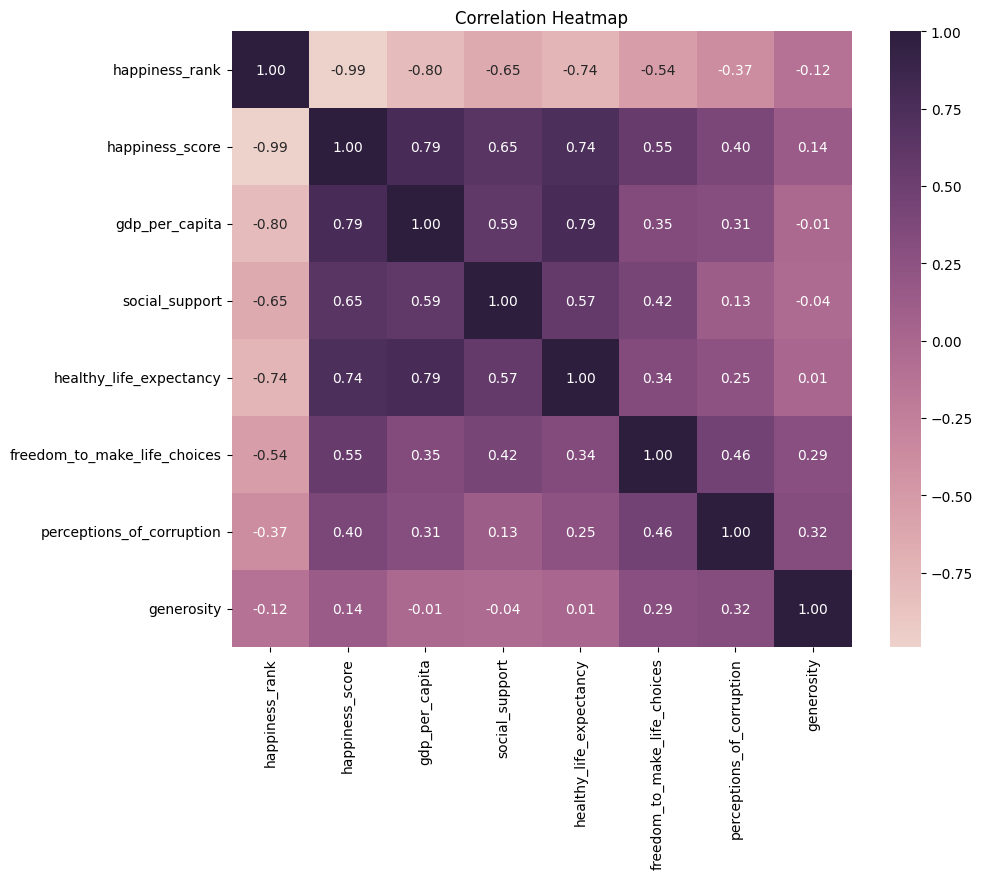

In [ ]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(concatenated_df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f") 
plt.title("Correlation Heatmap")
plt.show()


The heatmap analysis reveals information about the correlations between the variables, and is used with the objective of seeing which variables are significant enough to be used in the model and to have the best possible selection of variables. It stands out that the dependent variable, the 'happiness_score', exhibits a weak correlation, with a value of 0.14, in relation to the variable 'generosity'. This low coefficient points to a lack of significant linear association between then. In addition, 'generosity' presents weak correlations with other variables, its maximum value being 0.32 with 'perceptions_of_corruption'. Given the low correlation between 'generosity' and 'happiness_score', as well as with the other variables, it was decided to drop the column 'generosity' as a predictor in the regression model. <br>
The column 'happiness_rank' is also dropped due to its strong correlation with the dependent variable, with a value of -0.99. This variable ('happiness_rank') is directly derived from 'happiness_score', which could improve the final metrics of the model. However, its inclusion could introduce bias due to its close relationship with the main variable.

In [ ]:
concatenated_df.drop(columns={'generosity', 'happiness_rank'}, inplace=True)

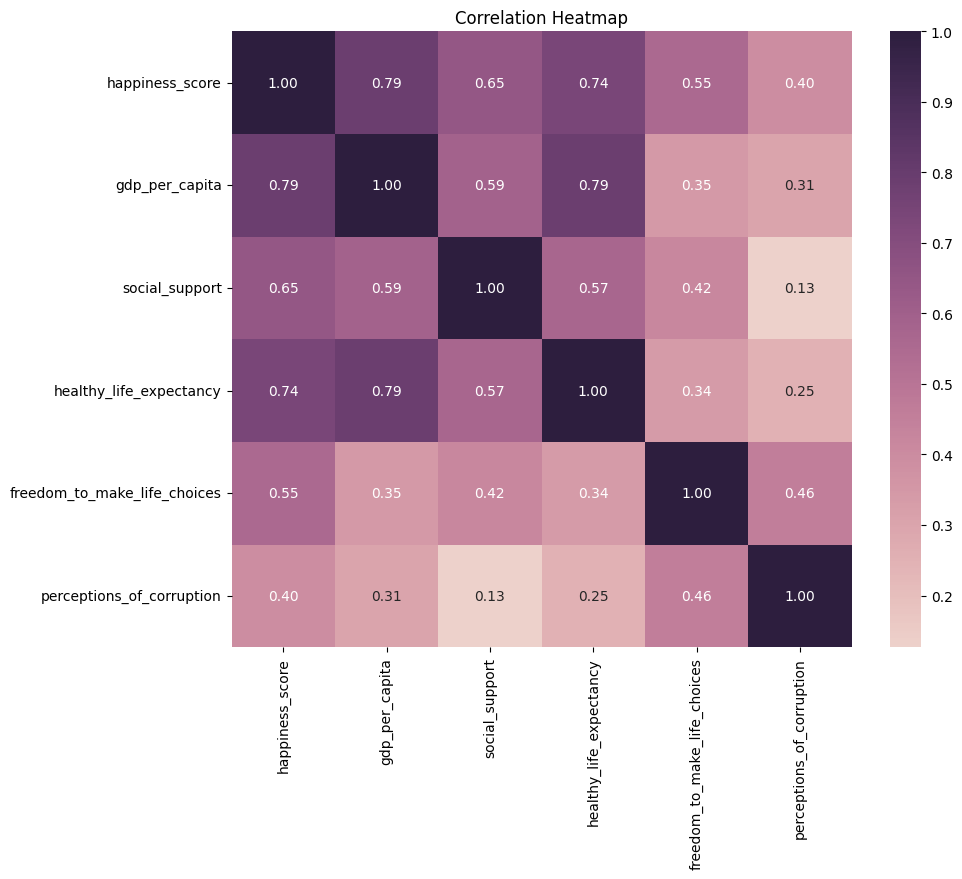

In [ ]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(concatenated_df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f") 
plt.title("Correlation Heatmap")
plt.show()

After making these final adjustments, the heatmap shows the variables selected for the model and their correlations with the dependent variable. These correlations are significant but not excessive, thus avoiding generating a bias in the model. Now, we will proceed to create the .pkl file that will contain the trained model with 70% of the data of these selected variables.

### Linear regression model - model training <br>
REFERENCE [1]

In this scenario, I have opted for a multiple linear regression model due to the nature of our objective: to predict a dependent variable from multiple predictor variables. The model training process will be performed on 70% of the data and this noteboook culminates with the export of the model in .pkl format. Subsequently, the predictions of the model will be made in the file 'model_prediction.ipynb' with the remaining 30% of the data which are the test data, and finally we will evaluate its performance using metrics such as mean_squared_error, mean_absolute_error and r2_score, which are in the file 'metric.py'.

Start by separating what will be the dependent variable or the one to be predicted (equivalent to 'y') from the rest of the variables (which will be a vector 'X', that is why it is represented with a capital letter).

In [ ]:
X = concatenated_df.drop('happiness_score',axis= 1) 
y = concatenated_df['happiness_score'] 

print(f"Independent variables for the model: \n {X.head(5)}") 
print(f"Dependent variable: \n  {y.head(5)}")


Independent variables for the model: 
            gdp_per_capita  social_support  healthy_life_expectancy  \
df_2015 0         1.39651         1.34951                  0.94143   
        1         1.30232         1.40223                  0.94784   
        2         1.32548         1.36058                  0.87464   
        3         1.45900         1.33095                  0.88521   
        4         1.32629         1.32261                  0.90563   

           freedom_to_make_life_choices  perceptions_of_corruption  
df_2015 0                       0.66557                    0.41978  
        1                       0.62877                    0.14145  
        2                       0.64938                    0.48357  
        3                       0.66973                    0.36503  
        4                       0.63297                    0.32957  
Dependent variable: 
  df_2015  0    7.587
         1    7.561
         2    7.527
         3    7.522
         4    7.427
Nam

The 'train_test_split()' method is employed to partition the data into training and test sets. The feature variables are provided as input to the method, and a test size of 0.3 is set, meaning that 30% of the data will go to the test set, while the training set will contain the remaining 70%. In addition, a random state ('random_state') is specified to ensure reproducibility of the results.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.3, random_state=101)


In [ ]:
print(f"Shape of 'X_train': {X_train.shape}")
print(f"Shape of 'X_test': {X_test.shape}")

Shape of 'X_train': (546, 5)
Shape of 'X_test': (235, 5)


Now, let's create the linear regression model

In [ ]:
model = LinearRegression() 

It's time to fit the model with the train data

In [ ]:
model.fit(X_train, y_train)
print('Model trained')

Model trained


For the moment, we finish with the model, so let's proceed to export it in a .pkl file using the joblib library. This file will be used later to make the predictions in the notebook 'model_prediction.ipynb'.

In [ ]:
joblib.dump(model, 'my_model.pkl')

# REFERENCE [2]

['my_model.pkl']

### REFERENCES

[1] Multiple Linear Regression With scikit learn. (2022, July 9). GeeksforGeeks; GeeksforGeeks. __https://www.geeksforgeeks.org/multiple-linear-regression-with-scikit-learn/__ <br>
[2]jcdmb. (2013, July 7). Python scikit-learn: exporting trained classifier. Stack Overflow. __https://stackoverflow.com/questions/17511968/python-scikit-learn-exporting-trained-classifier__

‌